### 問題：我是一個好奇(無聊)的人，想再判斷薪水是否跟年資相關
- [資料集](https://www.kaggle.com/datasets/rsadiq/salary)

# Environment

In [1]:
# HappyML install
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

In [2]:
# Load data
datasetName="Salary.csv"
datasetName = datasetName.replace(" ", "%20")
if not os.path.isfile(datasetName):
  os.system("wget https://raw.githubusercontent.com/StanOWO/1131_NTUAI_ML_Resource/main/dataset/" + datasetName)

# Preprocessing

In [3]:
import HappyML.preprocessor as pp

In [4]:
# Read CSV file
dataset = pp.dataset(file="Salary.csv")

In [5]:
# Decomposition the dataset into Independent & Dependent Variables
X, Y = pp.decomposition(dataset, x_columns=[0], y_columns=[1])

In [6]:
# Missing Data
X = pp.missing_data(X, strategy="mean")
Y = pp.missing_data(Y, strategy="mean")

In [7]:
# Split Training & Testing set
X_train, X_test, Y_train, Y_test = pp.split_train_test(X, Y, train_size=0.8, random_state=0)

# Model(Linear Regression)

In [8]:
from HappyML.regression import SimpleRegressor

regressor = SimpleRegressor()
Y_pred = regressor.fit(X_train, Y_train).predict(X_test)

# Performance

In [9]:
print("R-Squared Score:", regressor.r_score(X_test, Y_test))

R-Squared Score: 0.9708090245443415


# Visualization

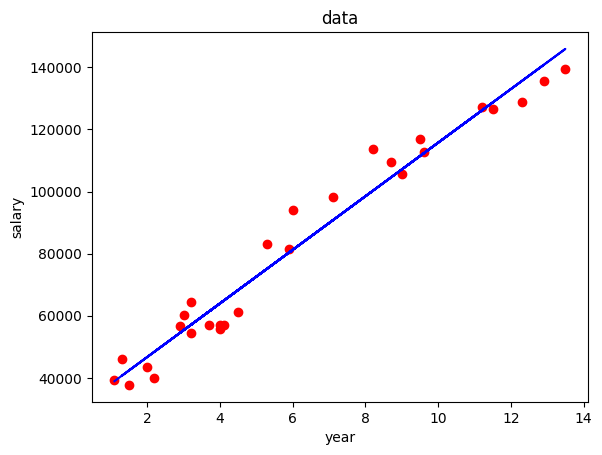

In [10]:
import HappyML.model_drawer as md

sample_data=(X_train, Y_train)
model_data=(X_train, regressor.predict(X_train))
md.sample_model(sample_data=sample_data, model_data=model_data,xlabel="year",ylabel="salary",
                title="data", font="DejaVu Sans")